In [1]:
import numpy as np
seed = 7
np.random.seed(seed)
import pandas as pd
from keras.models import load_model
from sklearn.metrics import mean_squared_error

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
radius = 'ak5' # Jet radius to use. Either 'ak5' or 'ak7'

In [3]:
model = load_model('models/{}/DeepJEC_{}.h5'.format(radius, radius))
df_jets_train = pd.read_pickle('data/{}/df_jets_train_{}.pkl'.format(radius, radius))
df_jets_test = pd.read_pickle('data/{}/df_jets_test_{}.pkl'.format(radius, radius))

/usr/local/lib/python2.7/site-packages/keras/engine/topology.py:1253: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  return cls(**config)


In [4]:
jet_images_train = np.stack(df_jets_train['jet_images'])
true_train = df_jets_train['jet_jes']
pred_train = model.predict([jet_images_train, df_jets_train['jet_pt'], df_jets_train['jet_eta']])

jet_images_test = np.stack(df_jets_test['jet_images'])
true_test = df_jets_test['jet_jes']
pred_test = model.predict([jet_images_test, df_jets_test['jet_pt'], df_jets_test['jet_eta']])

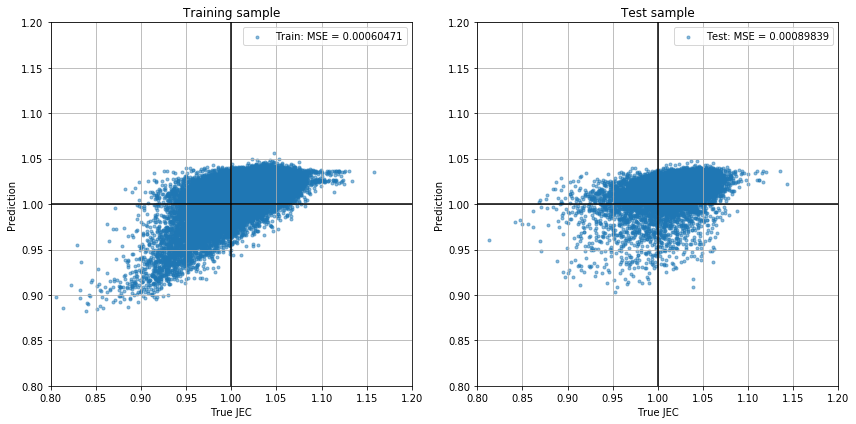

In [5]:
mse_train = mean_squared_error(true_train, pred_train)
mse_test = mean_squared_error(true_test, pred_test)
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.grid()
plt.xlim(0.8, 1.2)
plt.ylim(0.8, 1.2)
plt.hlines(1., 0.8, 1.2)
plt.vlines(1., 0.8, 1.2)
plt.xlabel('True JEC')
plt.ylabel('Prediction')

plt.scatter(true_train, pred_train, label='Train: MSE = {:.8f}'.format(mse_train), alpha=0.5 , marker='.')
plt.title('Training sample')
plt.legend()

plt.subplot(1,2,2)
plt.grid()
plt.xlim(0.8, 1.2)
plt.ylim(0.8, 1.2)
plt.hlines(1., 0.8, 1.2)
plt.vlines(1., 0.8, 1.2)
plt.xlabel('True JEC')
plt.ylabel('Prediction')

plt.scatter(true_test, pred_test, label='Test: MSE = {:.8f}'.format(mse_test), alpha=0.5 , marker='.')
plt.title('Test sample')
plt.legend()

plt.tight_layout()
plt.show()

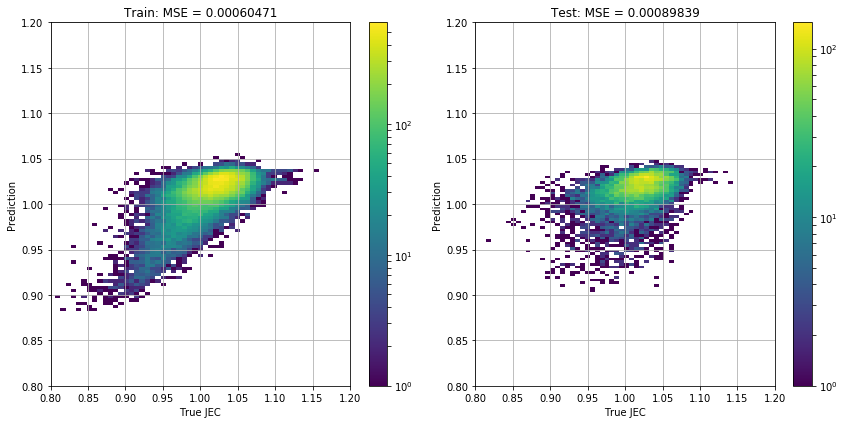

In [6]:
from matplotlib.colors import LogNorm
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.grid()
plt.hist2d(true_train, pred_train[:,0], bins=50, norm=LogNorm())
plt.title('Train: MSE = {:.8f}'.format(mse_train))
plt.xlabel( 'True JEC')
plt.ylabel('Prediction')
plt.colorbar()
plt.xlim(0.8, 1.2)
plt.ylim(0.8, 1.2)

plt.subplot(1,2,2)
plt.grid()
plt.hist2d(true_test, pred_test[:,0], bins=50, norm=LogNorm())
plt.title('Test: MSE = {:.8f}'.format(mse_test))
plt.xlabel( 'True JEC')
plt.ylabel('Prediction')
plt.colorbar()
plt.xlim(0.8, 1.2)
plt.ylim(0.8, 1.2)

plt.tight_layout()
plt.show()

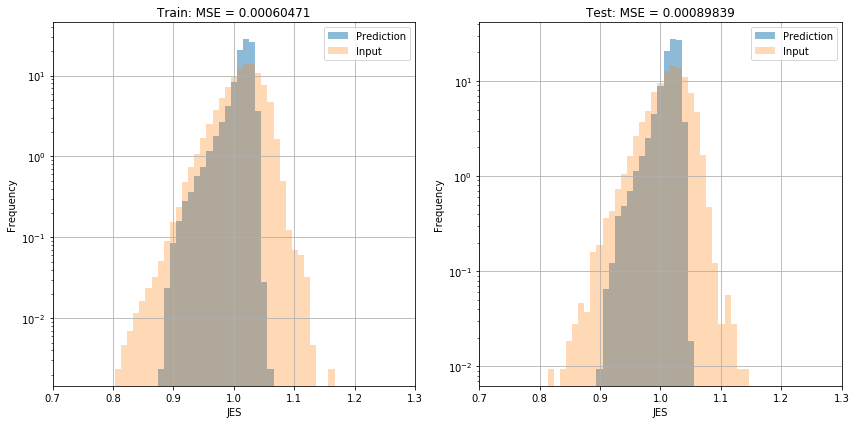

In [7]:
bins = np.linspace(0.5, 1.5, 100)
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.grid()
plt.hist(pred_train, bins, label='Prediction', alpha=0.5, normed=True)
plt.hist(true_train, bins, label='Input', alpha=0.3, normed=True)
plt.xlabel('JES')
plt.ylabel('Frequency')
plt.yscale('log')
plt.xlim(0.7, 1.3)
plt.title('Train: MSE = {:.8f}'.format(mse_train))
plt.legend()

plt.subplot(1,2,2)
plt.grid()
plt.hist(pred_test, bins, label='Prediction', alpha=0.5, normed=True)
plt.hist(true_test, bins, label='Input', alpha=0.3, normed=True)
plt.xlabel('JES')
plt.ylabel('Frequency')
plt.yscale('log')
plt.xlim(0.7, 1.3)
plt.title('Test: MSE = {:.8f}'.format(mse_test))
plt.legend()

plt.tight_layout()
plt.show()

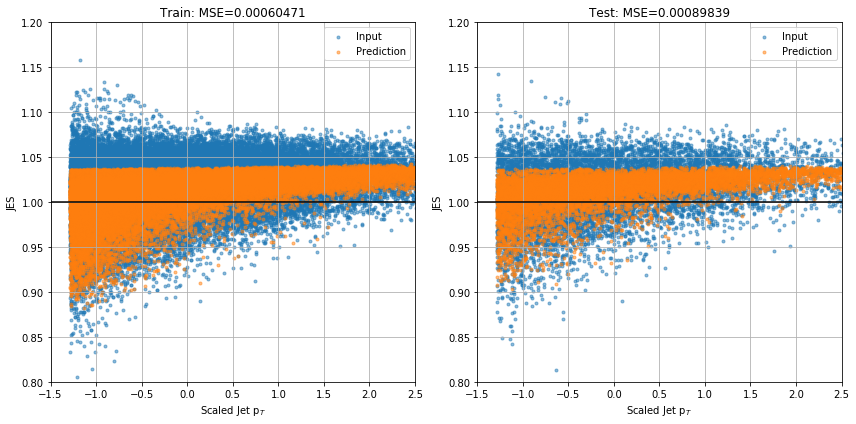

In [8]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.grid()
plt.title('Train: MSE={:.8f}'.format(mse_train))
plt.scatter( df_jets_train['jet_pt'], true_train, label='Input ', alpha=0.5 , marker='.')
plt.scatter( df_jets_train['jet_pt'], pred_train, label='Prediction', alpha=0.5 , marker='.')
plt.xlim((-1.5,2.5))
plt.ylim((0.8,1.2))
plt.hlines(1., -1.5,2.5)
plt.vlines(3.0, 0.8,1.2)
plt.xlabel(r'Scaled Jet p$_{T}$')
plt.ylabel('JES')
plt.legend()

plt.subplot(1,2,2)
plt.grid()
plt.title('Test: MSE={:.8f}'.format(mse_test))
plt.scatter( df_jets_test['jet_pt'], true_test, label='Input ', alpha=0.5 , marker='.')
plt.scatter( df_jets_test['jet_pt'], pred_test, label='Prediction', alpha=0.5 , marker='.')
plt.xlim((-1.5,2.5))
plt.ylim((0.8,1.2))
plt.hlines(1., -1.5,2.5)
plt.vlines(3.0, 0.8,1.2)
plt.xlabel(r'Scaled Jet p$_{T}$')
plt.ylabel('JES')
plt.legend()

plt.tight_layout()
plt.show()

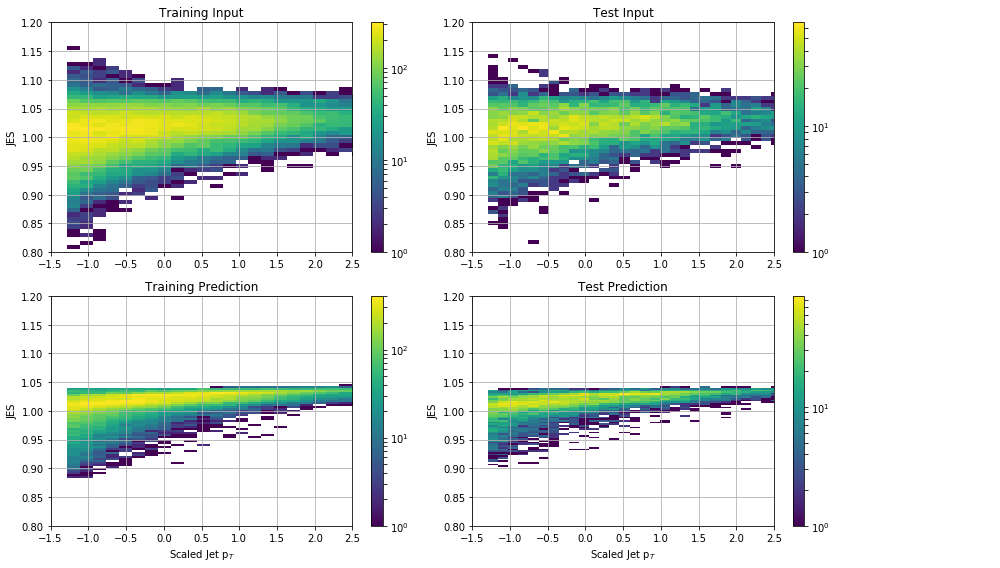

In [9]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.grid()
plt.title('Training Input')
plt.hist2d(df_jets_train['jet_pt'], true_train, bins=50, norm=LogNorm())
plt.xlim((-1.5,2.5))
plt.ylim((0.8,1.2))
plt.ylabel('JES')
plt.colorbar()

plt.subplot(2,2,3)
plt.grid()
plt.title('Training Prediction')
plt.hist2d(df_jets_train['jet_pt'], pred_train[:,0], bins=50, norm=LogNorm())
plt.xlim((-1.5,2.5))
plt.ylim((0.8,1.2))
plt.xlabel(r'Scaled Jet p$_{T}$')
plt.ylabel('JES')
plt.colorbar()

plt.subplot(2,2,2)
plt.grid()
plt.title('Test Input')
plt.hist2d(df_jets_test['jet_pt'], true_test, bins=50, norm=LogNorm())
plt.xlim((-1.5,2.5))
plt.ylim((0.8,1.2))
plt.ylabel('JES')
plt.colorbar()

plt.subplot(2,2,4)
plt.grid()
plt.title('Test Prediction')
plt.hist2d(df_jets_test['jet_pt'], pred_test[:,0], bins=50, norm=LogNorm())
plt.xlim((-1.5,2.5))
plt.ylim((0.8,1.2))
plt.xlabel(r'Scaled Jet p$_{T}$')
plt.ylabel('JES')
plt.colorbar()

plt.tight_layout()
plt.show()

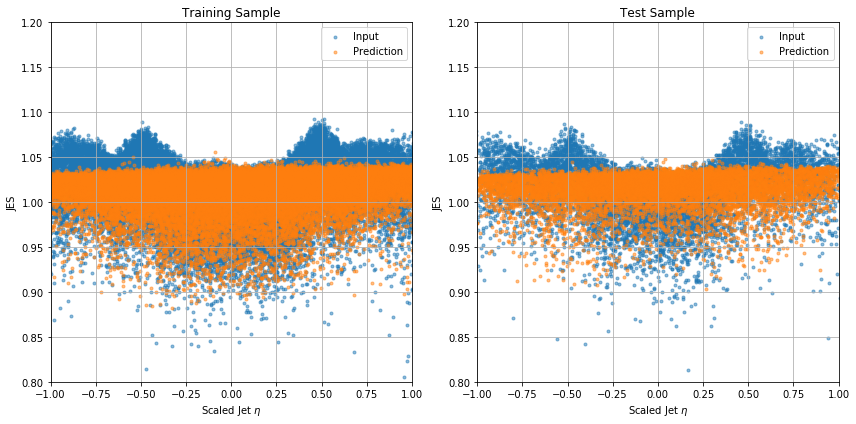

In [10]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.grid()
plt.title('Training Sample')
plt.scatter( df_jets_train['jet_eta'], true_train, label='Input ', alpha=0.5 , marker='.')
plt.scatter( df_jets_train['jet_eta'], pred_train, label='Prediction', alpha=0.5 , marker='.')
plt.xlim((-1.,1.))
plt.ylim((0.8,1.2))
plt.hlines(5., -1.,1.)
plt.vlines(3.0, 0.8,1.2)
plt.xlabel(r'Scaled Jet $\eta$')
plt.ylabel('JES')
plt.legend()

plt.subplot(1,2,2)
plt.grid()
plt.title('Test Sample')
plt.scatter( df_jets_test['jet_eta'], true_test, label='Input ', alpha=0.5 , marker='.')
plt.scatter( df_jets_test['jet_eta'], pred_test, label='Prediction', alpha=0.5 , marker='.')
plt.xlim((-1.,1.))
plt.ylim((0.8,1.2))
plt.hlines(5., -1.,1.)
plt.vlines(3.0, 0.8,1.2)
plt.xlabel(r'Scaled Jet $\eta$')
plt.ylabel('JES')
plt.legend()

plt.tight_layout()
plt.show()

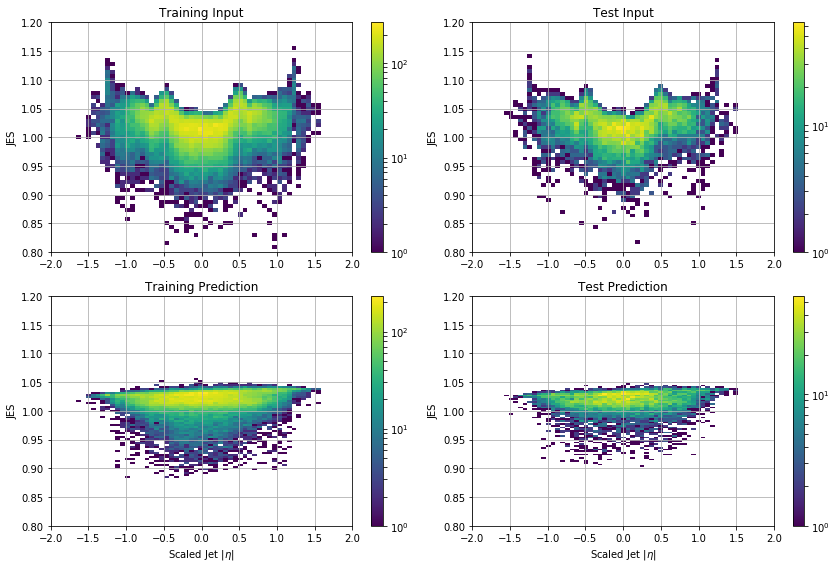

In [11]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.grid()
plt.title('Training Input')
plt.hist2d(df_jets_train['jet_eta'], true_train, bins=50, norm=LogNorm())
plt.xlim((-2.,2.))
plt.ylim((0.8,1.2))
plt.ylabel('JES')
plt.colorbar()

plt.subplot(2,2,3)
plt.grid()
plt.title('Training Prediction')
plt.hist2d(df_jets_train['jet_eta'], pred_train[:,0], bins=50, norm=LogNorm())
plt.xlim((-2.,2.))
plt.ylim((0.8,1.2))
plt.xlabel(r'Scaled Jet |$\eta$|')
plt.ylabel('JES')
plt.colorbar()

plt.subplot(2,2,2)
plt.grid()
plt.title('Test Input')
plt.hist2d(df_jets_test['jet_eta'], true_test, bins=50, norm=LogNorm())
plt.xlim((-2.,2.))
plt.ylim((0.8,1.2))
plt.ylabel('JES')
plt.colorbar()

plt.subplot(2,2,4)
plt.grid()
plt.title('Test Prediction')
plt.hist2d(df_jets_test['jet_eta'], pred_test[:,0], bins=50, norm=LogNorm())
plt.xlim((-2.,2.))
plt.ylim((0.8,1.2))
plt.xlabel(r'Scaled Jet |$\eta$|')
plt.ylabel('JES')
plt.colorbar()

plt.tight_layout()
plt.show()

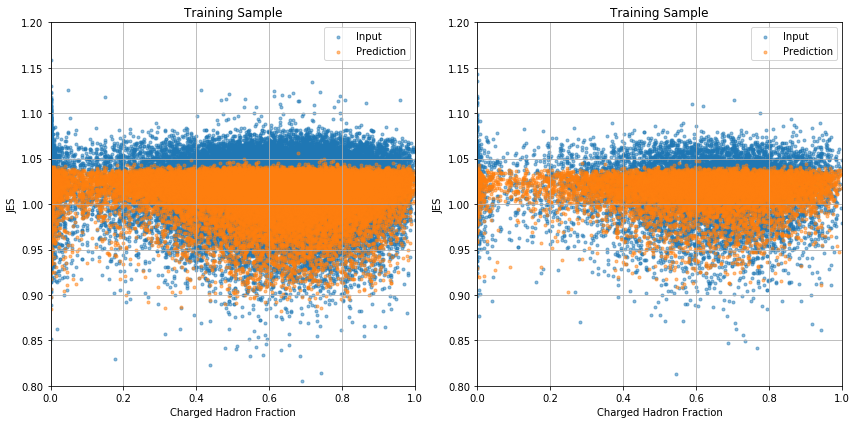

In [12]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.grid()
plt.title('Training Sample')
plt.scatter( df_jets_train['chf'], true_train, label='Input ', alpha=0.5 , marker='.')
plt.scatter( df_jets_train['chf'], pred_train, label='Prediction', alpha=0.5 , marker='.')
plt.xlim((0,1.))
plt.ylim((0.8,1.2))
plt.hlines(5., -1.,1.)
plt.vlines(3.0, 0.8,1.2)
plt.xlabel('Charged Hadron Fraction')
plt.ylabel('JES')
plt.legend()

plt.subplot(1,2,2)
plt.grid()
plt.title('Training Sample')
plt.scatter( df_jets_test['chf'], true_test, label='Input ', alpha=0.5 , marker='.')
plt.scatter( df_jets_test['chf'], pred_test, label='Prediction', alpha=0.5 , marker='.')
plt.xlim((0,1.))
plt.ylim((0.8,1.2))
plt.hlines(5., -1.,1.)
plt.vlines(3.0, 0.8,1.2)
plt.xlabel('Charged Hadron Fraction')
plt.ylabel('JES')
plt.legend()

plt.tight_layout()
plt.show()

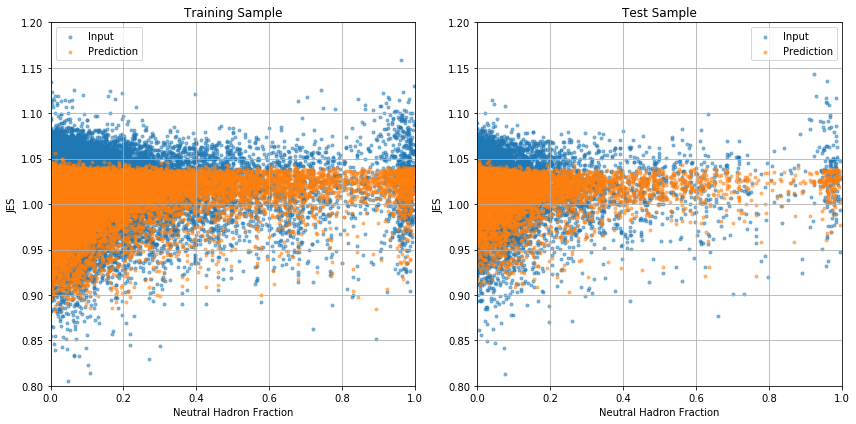

In [13]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.grid()
plt.title('Training Sample')
plt.scatter( df_jets_train['nhf'], true_train, label='Input ', alpha=0.5 , marker='.')
plt.scatter( df_jets_train['nhf'], pred_train, label='Prediction', alpha=0.5 , marker='.')
plt.xlim((0,1.))
plt.ylim((0.8,1.2))
plt.hlines(5., -1.,1.)
plt.vlines(3.0, 0.8,1.2)
plt.xlabel('Neutral Hadron Fraction')
plt.ylabel('JES')
plt.legend()

plt.subplot(1,2,2)
plt.grid()
plt.title('Test Sample')
plt.scatter( df_jets_test['nhf'], true_test, label='Input ', alpha=0.5 , marker='.')
plt.scatter( df_jets_test['nhf'], pred_test, label='Prediction', alpha=0.5 , marker='.')
plt.xlim((0,1.))
plt.ylim((0.8,1.2))
plt.hlines(5., -1.,1.)
plt.vlines(3.0, 0.8,1.2)
plt.xlabel('Neutral Hadron Fraction')
plt.ylabel('JES')
plt.legend()

plt.tight_layout()
plt.show()

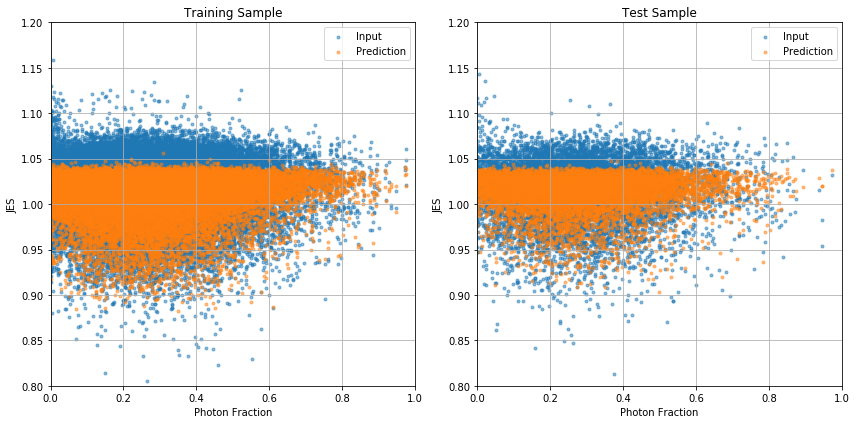

In [14]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.grid()
plt.title('Training Sample')
plt.scatter( df_jets_train['phf'], true_train, label='Input ', alpha=0.5 , marker='.')
plt.scatter( df_jets_train['phf'], pred_train, label='Prediction', alpha=0.5 , marker='.')
plt.xlim((0,1.))
plt.ylim((0.8,1.2))
plt.hlines(5., -1.,1.)
plt.vlines(3.0, 0.8,1.2)
plt.xlabel('Photon Fraction')
plt.ylabel('JES')
plt.legend()

plt.subplot(1,2,2)
plt.grid()
plt.title('Test Sample')
plt.scatter( df_jets_test['phf'], true_test, label='Input ', alpha=0.5 , marker='.')
plt.scatter( df_jets_test['phf'], pred_test, label='Prediction', alpha=0.5 , marker='.')
plt.xlim((0,1.))
plt.ylim((0.8,1.2))
plt.hlines(5., -1.,1.)
plt.vlines(3.0, 0.8,1.2)
plt.xlabel('Photon Fraction')
plt.ylabel('JES')
plt.legend()

plt.tight_layout()
plt.show()

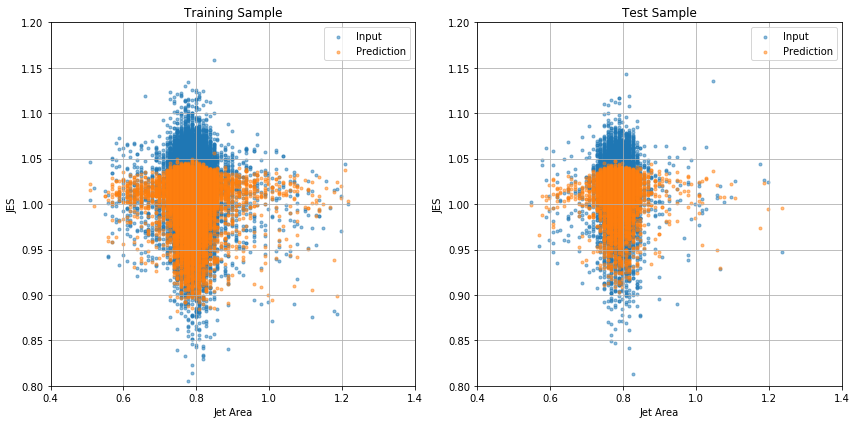

In [15]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.grid()
plt.title('Training Sample')
plt.scatter( df_jets_train['jet_area'], true_train, label='Input ', alpha=0.5 , marker='.')
plt.scatter( df_jets_train['jet_area'], pred_train, label='Prediction', alpha=0.5 , marker='.')
plt.xlim((0.4,1.4))
plt.ylim((0.8,1.2))
plt.hlines(5., -1.,1.)
plt.vlines(3.0, 0.8,1.2)
plt.xlabel('Jet Area')
plt.ylabel('JES')
plt.legend()

plt.subplot(1,2,2)
plt.grid()
plt.title('Test Sample')
plt.scatter( df_jets_test['jet_area'], true_test, label='Input ', alpha=0.5 , marker='.')
plt.scatter( df_jets_test['jet_area'], pred_test, label='Prediction', alpha=0.5 , marker='.')
plt.xlim((0.4,1.4))
plt.ylim((0.8,1.2))
plt.hlines(5., -1.,1.)
plt.vlines(3.0, 0.8,1.2)
plt.xlabel('Jet Area')
plt.ylabel('JES')
plt.legend()

plt.tight_layout()
plt.show()

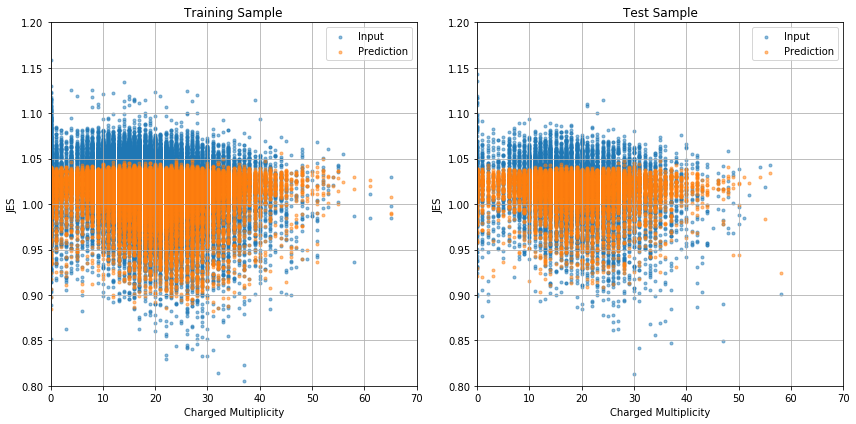

In [16]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.grid()
plt.title('Training Sample')
plt.scatter( df_jets_train['chm'], true_train, label='Input ', alpha=0.5 , marker='.')
plt.scatter( df_jets_train['chm'], pred_train, label='Prediction', alpha=0.5 , marker='.')
plt.xlim((0,70))
plt.ylim((0.8,1.2))
plt.hlines(5., -1.,1.)
plt.xlabel('Charged Multiplicity')
plt.ylabel('JES')
plt.legend()

plt.subplot(1,2,2)
plt.grid()
plt.title('Test Sample')
plt.scatter( df_jets_test['chm'], true_test, label='Input ', alpha=0.5 , marker='.')
plt.scatter( df_jets_test['chm'], pred_test, label='Prediction', alpha=0.5 , marker='.')
plt.xlim((0,70))
plt.ylim((0.8,1.2))
plt.hlines(5., -1.,1.)
plt.xlabel('Charged Multiplicity')
plt.ylabel('JES')
plt.legend()

plt.tight_layout()
plt.show()

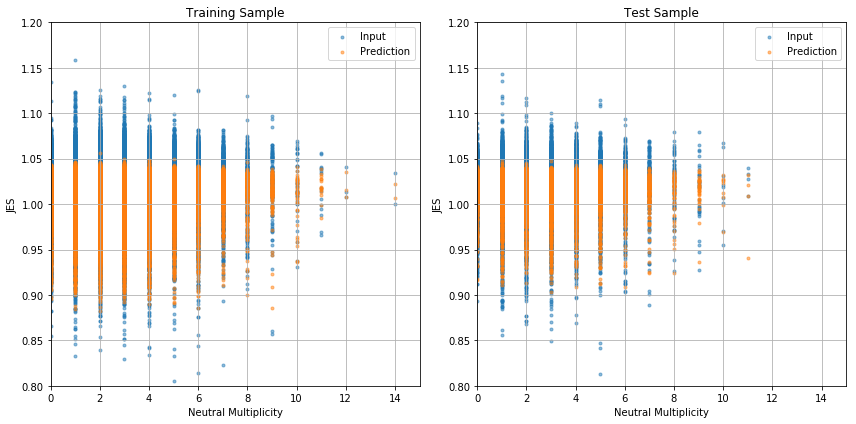

In [17]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.grid()
plt.title('Training Sample')
plt.scatter( df_jets_train['nhm'], true_train, label='Input ', alpha=0.5 , marker='.')
plt.scatter( df_jets_train['nhm'], pred_train, label='Prediction', alpha=0.5 , marker='.')
plt.xlim((0,15))
plt.ylim((0.8,1.2))
plt.hlines(5., -1.,1.)
plt.xlabel('Neutral Multiplicity')
plt.ylabel('JES')
plt.legend()

plt.subplot(1,2,2)
plt.grid()
plt.title('Test Sample')
plt.scatter( df_jets_test['nhm'], true_test, label='Input ', alpha=0.5 , marker='.')
plt.scatter( df_jets_test['nhm'], pred_test, label='Prediction', alpha=0.5 , marker='.')
plt.xlim((0,15))
plt.ylim((0.8,1.2))
plt.hlines(5., -1.,1.)
plt.xlabel('Neutral Multiplicity')
plt.ylabel('JES')
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
residual_train = (true_train - pred_train[:,0])/true_train
residual_test = (true_test - pred_test[:,0])/true_test

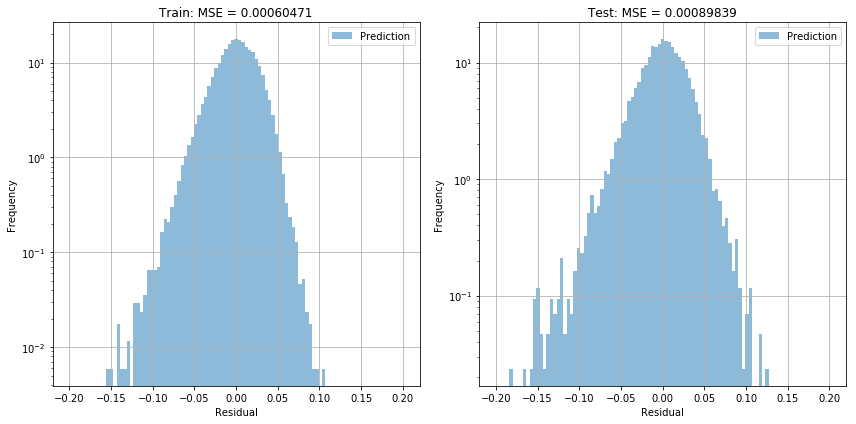

In [19]:
bins = np.linspace(-0.2, 0.2, 100)
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.grid()
plt.hist(residual_train, bins, label='Prediction', alpha=0.5, normed=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Train: MSE = {:.8f}'.format(mse_train))
plt.legend()

plt.subplot(1,2,2)
plt.grid()
plt.hist(residual_test, bins, label='Prediction', alpha=0.5, normed=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Test: MSE = {:.8f}'.format(mse_test))
plt.legend()

plt.tight_layout()
plt.show()

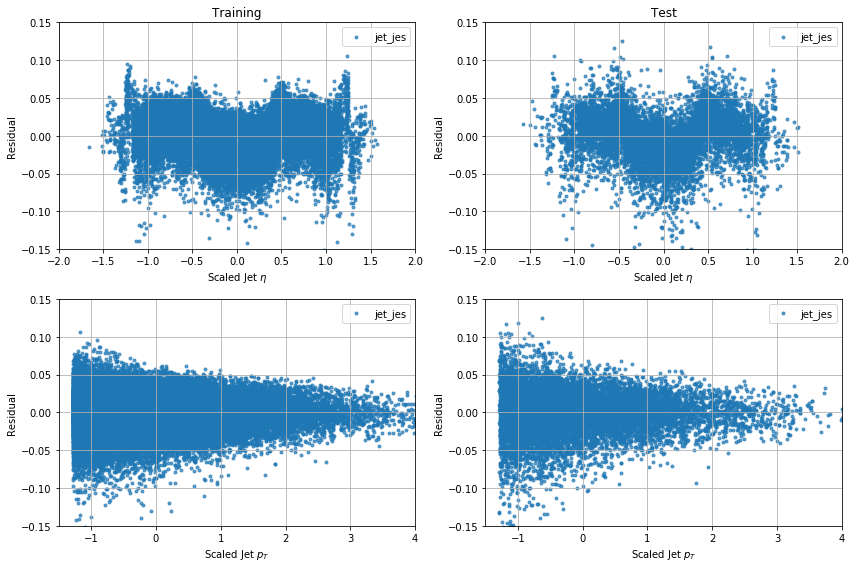

In [20]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.grid()
plt.scatter( df_jets_train['jet_eta'], residual_train, alpha=0.7 , marker='.')
plt.title("Training")
plt.xlim((-2.,2.))
plt.ylim((-0.15,0.15))
plt.hlines(5., -1.,1.)
plt.vlines(3.0, 0.8,1.2)
plt.xlabel(r'Scaled Jet $\eta$')
plt.ylabel('Residual')
plt.legend()

plt.subplot(2,2,3)
plt.grid()
plt.scatter( df_jets_train['jet_pt'], residual_train, alpha=0.7 , marker='.')
plt.xlim((-1.5,4))
plt.ylim((-0.15,0.15))
plt.hlines(5., -1.,1.)
plt.vlines(3.0, 0.8,1.2)
plt.xlabel(r'Scaled Jet $p_{T}$')
plt.ylabel('Residual')
plt.legend()

plt.subplot(2,2,2)
plt.grid()
plt.scatter( df_jets_test['jet_eta'], residual_test, alpha=0.7 , marker='.')
plt.title("Test")
plt.xlim((-2.,2.))
plt.ylim((-0.15,0.15))
plt.hlines(5., -1.,1.)
plt.vlines(3.0, 0.8,1.2)
plt.xlabel(r'Scaled Jet $\eta$')
plt.ylabel('Residual')
plt.legend()

plt.subplot(2,2,4)
plt.grid()
plt.scatter( df_jets_test['jet_pt'], residual_test, alpha=0.7 , marker='.')
plt.xlim((-1.5,4))
plt.ylim((-0.15,0.15))
plt.hlines(5., -1.,1.)
plt.vlines(3.0, 0.8,1.2)
plt.xlabel(r'Scaled Jet $p_{T}$')
plt.ylabel('Residual')
plt.legend()

plt.tight_layout()
plt.show()

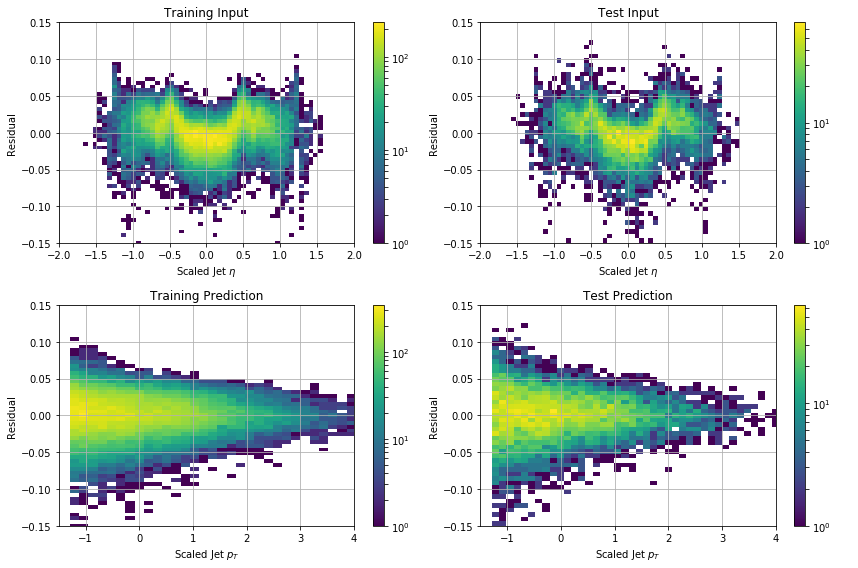

In [21]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.grid()
plt.title('Training Input')
plt.hist2d(df_jets_train['jet_eta'], residual_train, bins=50, norm=LogNorm())
plt.xlim((-2.,2.))
plt.ylim((-0.15,0.15))
plt.xlabel(r'Scaled Jet $\eta$')
plt.ylabel('Residual')
plt.colorbar()

plt.subplot(2,2,3)
plt.grid()
plt.title('Training Prediction')
plt.hist2d(df_jets_train['jet_pt'], residual_train, bins=50, norm=LogNorm())
plt.xlim((-1.5,4))
plt.ylim((-0.15,0.15))
plt.xlabel(r'Scaled Jet $p_{T}$')
plt.ylabel('Residual')
plt.colorbar()

plt.subplot(2,2,2)
plt.grid()
plt.title('Test Input')
plt.hist2d(df_jets_test['jet_eta'], residual_test, bins=50, norm=LogNorm())
plt.xlim((-2.,2.))
plt.ylim((-0.15,0.15))
plt.xlabel(r'Scaled Jet $\eta$')
plt.ylabel('Residual')
plt.colorbar()

plt.subplot(2,2,4)
plt.grid()
plt.title('Test Prediction')
plt.hist2d(df_jets_test['jet_pt'], residual_test, bins=50, norm=LogNorm())
plt.xlim((-1.5,4))
plt.ylim((-0.15,0.15))
plt.xlabel(r'Scaled Jet $p_{T}$')
plt.ylabel('Residual')
plt.colorbar()

plt.tight_layout()
plt.show()